<a href="https://colab.research.google.com/github/SaketMunda/tensorflow-fundamentals/blob/master/02_neural_network_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow Exercises

This notebook consist of various exercises that are listed in the [readMe](https://github.com/SaketMunda/tensorflow-fundamentals/blob/master/README.md) of the [Github Repo](https://github.com/SaketMunda/tensorflow-fundamentals)

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Replicate the model pictured in the TensorFlow Playground diagram 

Given below is the diagram, use TensorFlow code and Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

![image](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)

In [2]:
# First need to create some dataset for this, X (data) and y (labels)
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
X, y = make_circles(n_samples, noise= 0.03, random_state = 17)

In [3]:
# Let's check the samples
X[:5], y[:5]

(array([[-0.69661282, -0.32845725],
        [ 0.95581012, -0.05841444],
        [ 0.53469756, -0.57338982],
        [-0.89332834,  0.42098993],
        [-0.65647965, -0.4353153 ]]), array([1, 0, 1, 0, 1]))

In [4]:
# Shape of the samples
X.shape, y.shape

((1000, 2), (1000,))

Okay what we learned from the data ? Seeing the data in this format is not speaking out anything. Let's visualize it.

In [11]:
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label": y})
circles.head(10)

,X0,X1,label
0,-0.696613,-0.328457,1
1,0.955810,-0.058414,0
2,0.534698,-0.573390,1
3,-0.893328,0.420990,0
4,-0.656480,-0.435315,1
5,0.611903,0.800231,0
6,-0.598358,-0.567453,1
7,0.331679,0.922320,0
8,0.782751,-0.135743,1
9,0.579686,0.842586,0


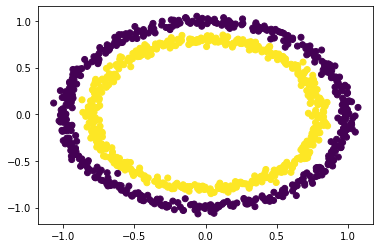

In [13]:
# If we use this dataframe to plot
plt.scatter(circles["X0"], circles["X1"], c=circles["label"]);

In [14]:
# check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

We can see that we have label `0` and `1`, it means that we're going to solve a binary classification problem.

In [16]:
# Let's split our data into training and test set, ratio will be 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
# Check the shapes of training and test samples
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Alright, now we are ready to build our model and replicate the layers shown above in the TensorFlow playground screenshot.

In [19]:
# set the random seed
tf.random.set_seed(17)

# Create a model with 5 hidden layers having 6 neuron each layer with activation as ReLu and 1 output layer with activation as sigmoid
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=100,
                        validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6864 - val_accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5088 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5150 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5263 - val_loss: 0.6875 - val_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5387 - val_loss: 0.6874 - val_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5387 - val_loss: 0.6872 - val_accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5325 - val_loss: 0.6858 - val_accuracy: 0.4950
Epoch 8/100


Our model performed pretty well with `Accuracy` **99%**.

Now to replicate the figure we need to plot the decision boundary. Let's do then,

In [35]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: 
    print("Doing multi-class classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary-class classification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c = y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary-class classification...


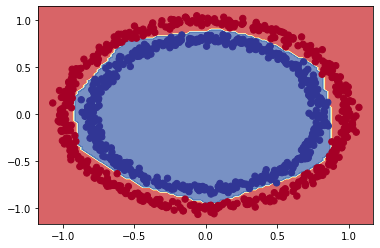

In [36]:
plot_decision_boundary(model_1, X, y)